## 误差线

`errorbar(x, y, yerr, xerr, fmt, *, lolims, uplims, xlolims, xuplims, errorevery)`

<div style="display: flex;">
<div style="float: left;">

|Arguments                                |Type                          |Default |Desc                                     |
|-----------------------------------------|------------------------------|--------|-----------------------------------------|
|`xerr`, `yerr`                           |Union[float, list]            |None    |optional, error bars                     |
|`lolims`, `uplims`, `xlolims`, `xuplims` |Union[bool, list[bool]]       |False   |used to indicate that a value gives only upper/lower limits|
|`errorevery`                             |Union[int, tuple[int, int]]   |1       |draws error bars on a subset of the data.|

</div>
</div>






-----

### Table of Contents

<p>
  <div>
    <a href="#xerr,yerr"> <span class="toc-item-num">1 xerr, yerr 参数绘制 X 轴和 Y 轴误差线</span> </a>
  </div>
  <div>
    <a href="#lolims,uplims,xlolims,xuplims"> <span class="toc-item-num">2 *lims* 指示某个值仅给出上限/下限</span> </a>
  </div>
  <div>
    <a href="#errorevery"> <span class="toc-item-num">3 errorevery 采样误差线</span> </a>
  </div>
</p>

-----

### xerr,yerr

- scalar: Symmetric +/- values for all data points.
- shape(N,): Symmetric +/-values for each data point.
- shape(2, N): Separate - and + values for each bar. First row contains the lower errors, the second row contains the upper errors.
- *None*: No errorbar.

All values must be >= 0.

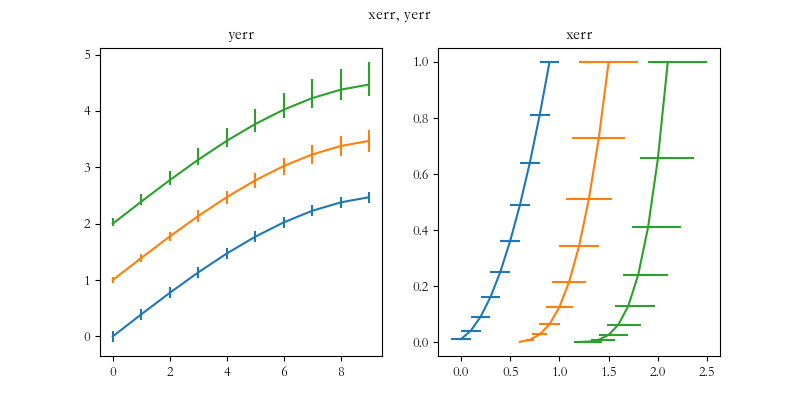

In [1]:
%matplotlib widget
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rcParams["font.sans-serif"] = ["Kaiti SC", "Menlo"] # 设置字体

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))

x = np.arange(10)
y1 = 2.5 * np.sin(x / 20 * np.pi)
y1_err = 0.1
y2 = y1 + 1
y2_err = np.linspace(0.05, 0.2, 10)
y3 = y1 + 2
y3_err = np.array([np.linspace(0.05, 0.2, 10), np.linspace(0.1, 0.4, 10)])
ax1.errorbar(x, y1, yerr=y1_err)
ax1.errorbar(x, y2, yerr=y2_err)
ax1.errorbar(x, y3, yerr=y3_err)
ax1.set_title("yerr")

x = np.arange(10) / 10
y1 = (x + 0.1) ** 2
x1_err = 0.1
y2 = (x + 0.1) ** 3
x2_err = np.linspace(0.01, 0.3, 10)
y3 = (x + 0.1) ** 4
x3_err = np.array([np.linspace(0.05, 0.2, 10), np.linspace(0.1, 0.4, 10)])
ax2.errorbar(x, y1, xerr=x1_err)
ax2.errorbar(x+0.6, y2, xerr=x2_err)
ax2.errorbar(x+1.2, y3, xerr=x3_err)
ax2.set_title("xerr")

fig.suptitle("xerr, yerr")

plt.show()

### lolims,uplims,xlolims,xuplims

These arguments can be used to indicate that a value gives only upper/lower limits.

setting e.g. *lolims* to True means that the y-value is a *lower* limit of the True value, so, only an *upward*-pointing arrow will be drawn!

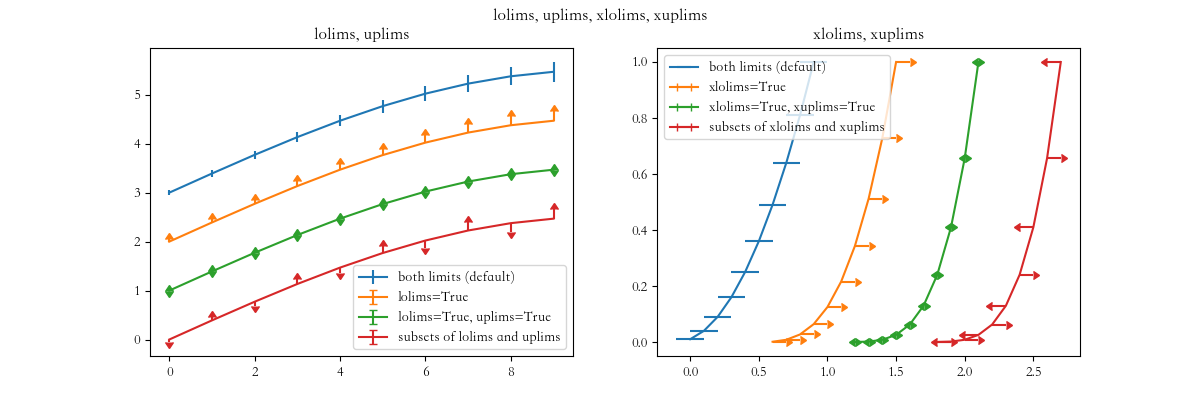

In [6]:
%matplotlib widget
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rcParams["font.sans-serif"] = ["Kaiti SC", "Menlo"] # 设置字体

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

x = np.arange(10)
y = 2.5 * np.sin(x / 20 * np.pi)
yerr = np.linspace(0.05, 0.2, 10)

ax1.errorbar(x, y + 3, yerr=yerr, label="both limits (default)")
ax1.errorbar(x, y + 2, yerr=yerr, lolims=True, label="lolims=True")
ax1.errorbar(x, y + 1, yerr=yerr, lolims=True, uplims=True, label="lolims=True, uplims=True")
lowerlimits, upperlimits = [False] * len(x), [False] * len(x)
lowerlimits[1::2] = [True] * len(lowerlimits[1::2])
upperlimits[0::2] = [True] * len(upperlimits[0::2])
ax1.errorbar(x, y, yerr=yerr, lolims=lowerlimits, uplims=upperlimits, label="subsets of lolims and uplims")
ax1.set_title("lolims, uplims")
ax1.legend(loc="lower right")

x = x / 10.0
ax2.errorbar(x, (x + 0.1)**2, xerr=0.1, label="both limits (default)")
ax2.errorbar(x + 0.6, (x + 0.1)**3, xerr=0.1, xlolims=True, label="xlolims=True")
ax2.errorbar(x + 1.2, (x + 0.1)**4, xerr=0.1, xlolims=True, xuplims=True, label="xlolims=True, xuplims=True")
xlowerlimits, xupperlimits = [False] * len(x), [False] * len(x)
xlowerlimits[0::2] = [True] * len(xlowerlimits[0::2])
xupperlimits[1::2] = [True] * len(xupperlimits[1::2])
ax2.errorbar(x + 1.8, (x + 0.1)**4, xerr=0.1, xlolims=xlowerlimits, xuplims=xupperlimits, label="subsets of xlolims and xuplims")
ax2.set_title("xlolims, xuplims")
ax2.legend(loc="upper left")

fig.suptitle("lolims, uplims, xlolims, xuplims")

plt.show()

### errorevery

*errorevery*=N draws error bars on the points (x[::N], y[::N]).

*errorevery*=(start, N) draws error bars on the points (x[start::N], y[start::N]).


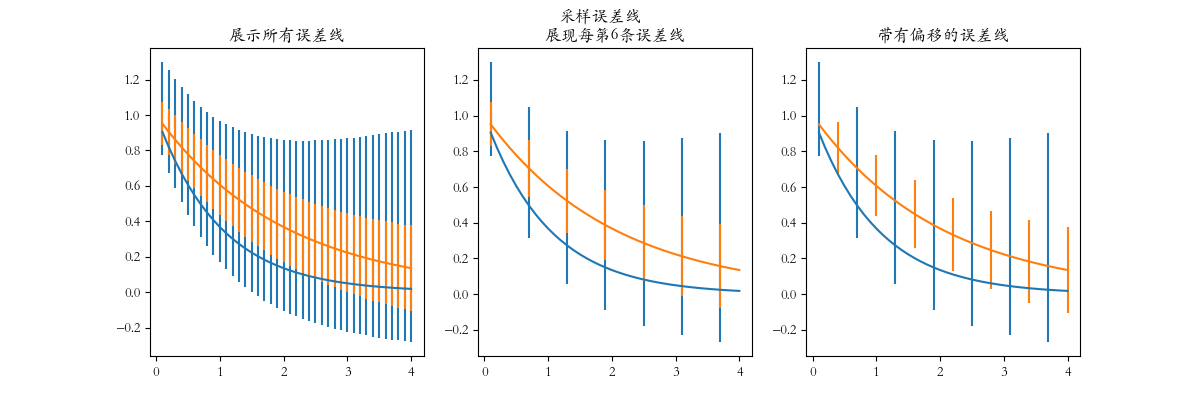

In [3]:
%matplotlib widget
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rcParams["font.sans-serif"] = ["Kaiti SC", "Menlo"] # 设置字体

x = np.arange(0.1, 4.1, 0.1)
y1 = np.exp(-1.0 * x)
y2 = np.exp(-0.5 * x)

y1_err = np.array([0.1 + 0.1 * np.sqrt(x), 0.3 + 0.3 * np.sqrt(x)])
y2_err = 0.1 + 0.1 * np.sqrt(x / 2)

fig, axes = plt.subplots(1, 3, figsize=(12, 4))

axes[0].errorbar(x, y1, y1_err)
axes[0].errorbar(x, y2, y2_err)
axes[0].set_title("展示所有误差线")

axes[1].errorbar(x, y1, y1_err, errorevery=6)
axes[1].errorbar(x, y2, y2_err, errorevery=6)
axes[1].set_title("展现每第6条误差线")

axes[2].errorbar(x, y1, y1_err, errorevery=(0, 6))
axes[2].errorbar(x, y2, y2_err, errorevery=(3, 6))
axes[2].set_title("带有偏移的误差线")

fig.suptitle("采样误差线")

plt.show()

In [4]:
plt.errorbar??

Signature:
plt.errorbar(
    x: 'float | ArrayLike',
    y: 'float | ArrayLike',
    yerr: 'float | ArrayLike | None' = None,
    xerr: 'float | ArrayLike | None' = None,
    fmt: 'str' = '',
    *,
    ecolor: 'ColorType | None' = None,
    elinewidth: 'float | None' = None,
    capsize: 'float | None' = None,
    barsabove: 'bool' = False,
    lolims: 'bool | ArrayLike' = False,
    uplims: 'bool | ArrayLike' = False,
    xlolims: 'bool | ArrayLike' = False,
    xuplims: 'bool | ArrayLike' = False,
    errorevery: 'int | tuple[int, int]' = 1,
    capthick: 'float | None' = None,
    data=None,
    **kwargs,
) -> 'ErrorbarContainer'
Docstring:
Plot y versus x as lines and/or markers with attached errorbars.

*x*, *y* define the data locations, *xerr*, *yerr* define the errorbar
sizes. By default, this draws the data markers/lines as well as the
errorbars. Use fmt='none' to draw errorbars without any data markers.

.. versionadded:: 3.7
   Caps and error lines are drawn in polar coordi